## Pulse Width Modulation (PWM)

### Definition and Principle

Pulse Width Modulation is a pulse modulation technique in which the **width (duration) of fixed-amplitude, fixed-position pulses is varied in proportion to the instantaneous amplitude of the analog message signal**.

**Key Characteristic:** The information is encoded in the pulse duration (on-time) while amplitude and position remain constant.

### Theory and Working

#### Basic Process

1. A reference sawtooth or triangular waveform is generated at the sampling rate
2. The message signal is compared with this reference waveform
3. When message signal > reference, the pulse output is HIGH
4. When message signal < reference, the pulse output is LOW
5. The pulse width is proportional to the instantaneous message amplitude

### Generation of PWM

**Block Diagram Components:**
1. **Sampler** - Extracts signal values at sampling rate
2. **Comparator** - Compares message signal with sawtooth/triangular reference
3. **Pulse Generator** - Produces variable-width pulses based on comparison
4. **Output Stage** - Delivers PWM signal

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal


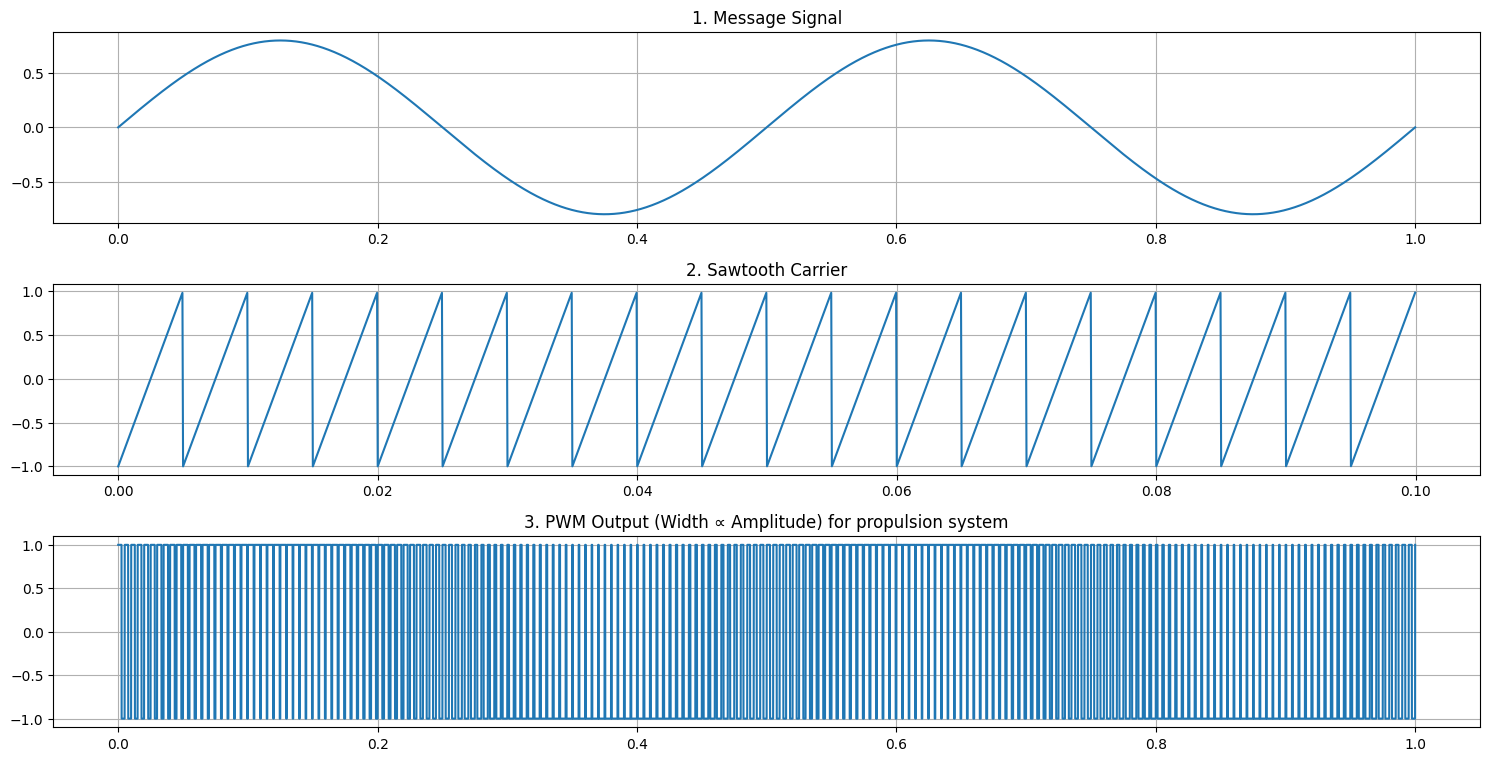

In [12]:

def generate_pwm_complete(message_freq=5, carrier_freq=100, duration=1):
    """Complete PWM: Message → Sawtooth comparison → Variable width pulses"""
    t = np.linspace(0, duration, 20000)  # Higher resolution
    msg = 0.8 * np.sin(2*np.pi*message_freq*t)  # Message (scaled)
    
    # Sawtooth carrier (much higher freq)
    sawtooth_periods = t * carrier_freq
    sawtooth = 2 * (sawtooth_periods - np.floor(sawtooth_periods)) - 1
    
    # PWM: HIGH when msg > sawtooth (width ∝ msg amplitude)
    pwm_signal = np.where(msg > sawtooth, 1, -1)
    
    plt.figure(figsize=(15,10))
    plt.subplot(4,1,1); plt.plot(t, msg); plt.title('1. Message Signal'); plt.grid()
    plt.subplot(4,1,2); plt.plot(t[:2000], sawtooth[:2000]); plt.title('2. Sawtooth Carrier'); plt.grid()
    plt.subplot(4,1,3); plt.plot(t, pwm_signal); plt.title('3. PWM Output (Width ∝ Amplitude) for propulsion system'); plt.grid()
    plt.tight_layout(); plt.show()
    
    return pwm_signal, t, msg

pwm_sig, t, msg = generate_pwm_complete(message_freq=2, carrier_freq=200)  # Slow msg, fast carrier

### Demodulation of PWM

PWM demodulation requires:
1. **Width Detection** - Measuring pulse duration at each sampling instant
2. **Amplitude Conversion** - Converting pulse width back to proportional amplitude
3. **Low-Pass Filtering** - Extracting the message signal envelope
4. **Integration** - Reconstructing the original analog signal

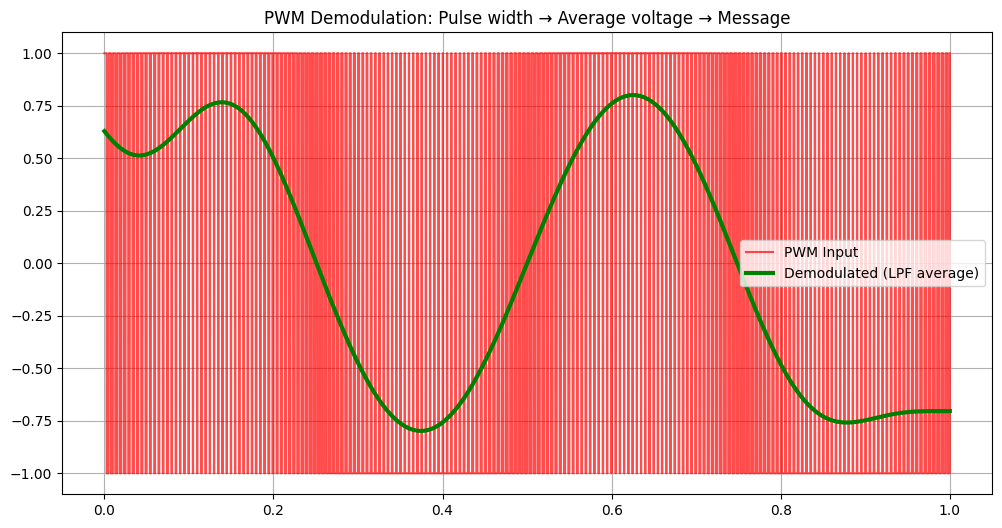

Demodulation Error: 0.1363 (lower = better)


In [13]:
def pwm_demodulator(pwm_signal, t, message_bw=10):
    """PWM Demod: LPF averages pulse widths → proportional DC → message"""
    # Low-pass filter (cutoff = message bandwidth)
    fs = len(t)/t[-1]  # Sampling freq
    cutoff = message_bw / (fs/2)  # Normalized cutoff
    b, a = signal.butter(4, cutoff, btype='low')
    demodulated = signal.filtfilt(b, a, pwm_signal)
    
    plt.figure(figsize=(12,6))
    plt.plot(t, pwm_signal, 'r', alpha=0.7, label='PWM Input')
    plt.plot(t, demodulated, 'g', linewidth=3, label='Demodulated (LPF average)')
    plt.title('PWM Demodulation: Pulse width → Average voltage → Message'); plt.legend(); plt.grid()
    plt.show()
    
    # Quality check
    error = np.std(msg - demodulated[:len(msg)])
    print(f"Demodulation Error: {error:.4f} (lower = better)")
    
pwm_demodulator(pwm_sig, t, message_bw=5)


### Advantages and Disadvantages

**Advantages:**
- **Better noise immunity** than PAM - noise affects pulse edges, not amplitude directly
- Constant amplitude pulses enable digital-level processing
- Efficient power utilization in switching applications
- Suitable for power electronics and motor control
- Better signal-to-noise ratio (SNR) performance

**Disadvantages:**

- More complex demodulation circuitry required
- Non-linear relationship between signal and pulse width (requires calibration)
- Sensitive to timing jitter in the reference waveform
- Bandwidth requirement slightly higher than PAM
- Difficult to achieve very high modulation indices

### Applications

**Primary Applications:**

1. **Ship Propulsion Systems** - Variable-speed motor control for main engines and auxiliary propulsion
2. **Power Supply Control** - Efficient DC-DC converters and voltage regulation in naval vessels
3. **Fan and Pump Speed Control** - Cooling systems, ballast systems, fuel management
4. **Weapon System Drives** - Turret and launcher positioning systems
5. **Submarine Stealth Drive** - Silent electric propulsion in submarines
6. **Lighting Control** - Dimming systems and emergency lighting
7. **Thermal Management** - Heater and cooler control systems
8. Reduced heat dissipation compared to analog voltage regulation
9. Better efficiency at partial load (critical for ships at sea)
10.Noise immunity for long-distance naval communications
11. Suitable for confined spaces with limited cooling